In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data_df = pd.read_csv("./US_Accidents_March23.csv")
data_df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
data_df.isna().any()

ID                       False
Source                   False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                   True
End_Lng                   True
Distance(mi)             False
Description               True
Street                    True
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity                  False
Bump                     False
Crossing                 False
Give_Way

In [5]:
data_df.shape

(7728394, 46)

### Since the dataset is large, we directly drop row with nan value

In [6]:
data_df_without_nan = data_df.dropna(axis=0)
data_df_without_nan.shape

(3554549, 46)

In [7]:
data_df_without_nan.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### We selected features that we likely use in the future

In [11]:
features_df = data_df_without_nan[['Severity','Distance(mi)','Description','Start_Time','End_Time','Timezone','Weather_Timestamp','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']]

In [12]:
features_df.head()

,Severity,Distance(mi),Description,Start_Time,End_Time,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3402762,3,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,2016-02-08 00:37:08,2016-02-08 06:37:08,US/Eastern,2016-02-08 00:53:00,42.1,36.1,58.0,...,False,False,False,False,False,False,Night,Night,Night,Night
3402767,3,0.500,At Mitchell Ave/Exit 6 - Accident.,2016-02-08 07:53:43,2016-02-08 13:53:43,US/Eastern,2016-02-08 07:53:00,37.0,29.8,93.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3402771,2,0.521,At Bagley Rd/Exit 235 - Accident.,2016-02-08 11:51:46,2016-02-08 17:51:46,US/Eastern,2016-02-08 11:51:00,33.1,30.0,92.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3402773,2,0.826,At I-71/Exit 26 - Accident.,2016-02-08 15:16:43,2016-02-08 21:16:43,US/Eastern,2016-02-08 15:12:00,32.0,28.7,100.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3402774,2,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,2016-02-08 15:43:50,2016-02-08 21:43:50,US/Eastern,2016-02-08 15:47:00,33.8,29.6,100.0,...,False,False,False,False,False,False,Day,Day,Day,Day


### The time distribution of the accident

/var/folders/r4/l54jdjtx3ms0b_p6yqw0sj9c0000gn/T/ipykernel_38447/2396775426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['Start_Time'] = pd.to_datetime(features_df['Start_Time'], errors='coerce')
/var/folders/r4/l54jdjtx3ms0b_p6yqw0sj9c0000gn/T/ipykernel_38447/2396775426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hour'] = df_clean['Start_Time'].dt.hour


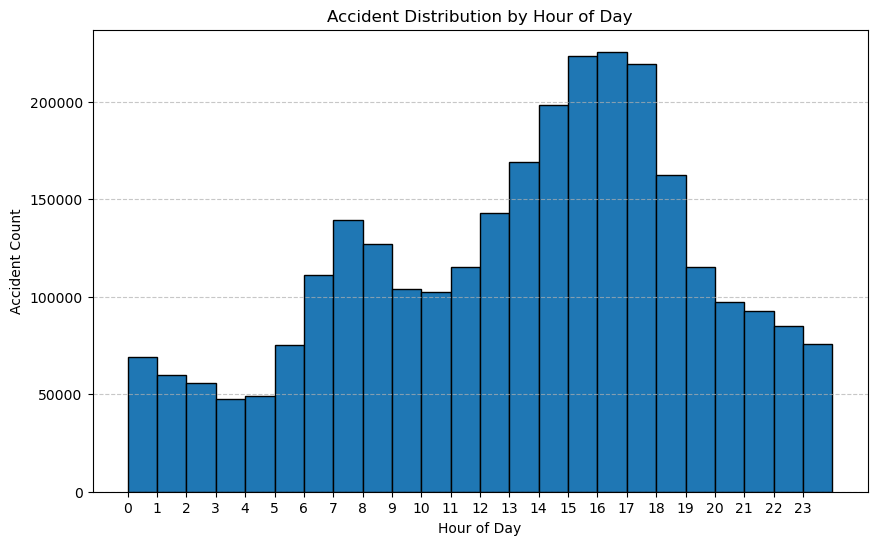

In [13]:

features_df['Start_Time'] = pd.to_datetime(features_df['Start_Time'], errors='coerce')

df_clean = features_df[features_df['Start_Time'].notna()]


df_clean['hour'] = df_clean['Start_Time'].dt.hour

plt.figure(figsize=(10, 6))
plt.hist(df_clean['hour'], bins=24, range=(0, 24), edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.title('Accident Distribution by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### The top20 weather conditions of the accident

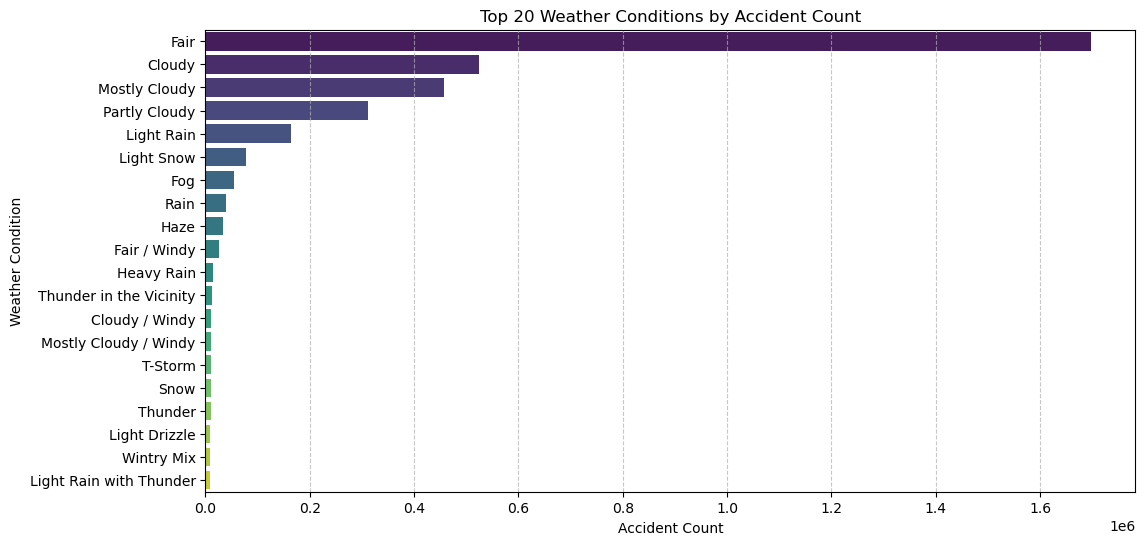

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


df_weather_counts = features_df['Weather_Condition'].value_counts()
top20_weather = df_weather_counts.head(20)

top20_df = top20_weather.reset_index()
top20_df.columns = ['Weather_Condition', 'Count']


plt.figure(figsize=(12, 6))
sns.barplot(y='Weather_Condition', x='Count', data=top20_df, palette='viridis')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.title('Top 20 Weather Conditions by Accident Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### The severity of the accident (target value)

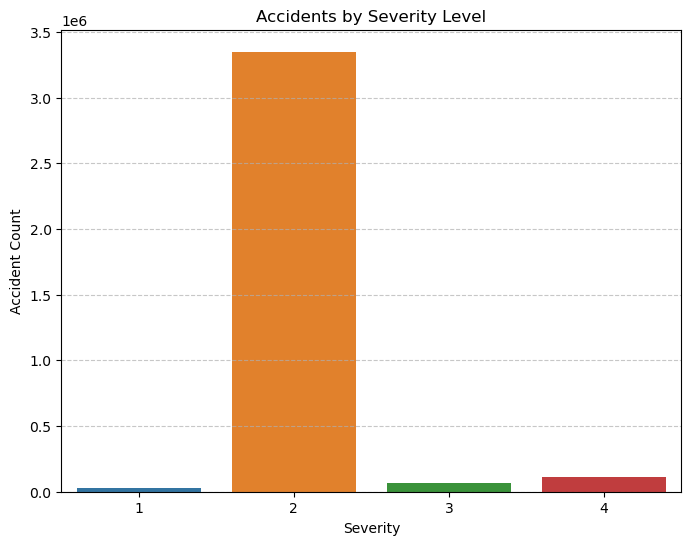

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=features_df)
plt.xlabel('Severity')
plt.ylabel('Accident Count')
plt.title('Accidents by Severity Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
features_df_1 = data_df_without_nan[['Severity','Distance(mi)','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  
X = features_df_1.drop('Severity', axis=1)
y = features_df_1['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, 
                                            max_depth=None, 
                                            random_state=42)  

random_forest_model.fit(X_train, y_train)
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')



KeyboardInterrupt: 